# Initialization

In [2]:
import requests
import base64
from PIL import Image
import numpy as np
from io import BytesIO
import cv2

In [3]:
def draw_bounding_box(image,detected_boxes):
    # Convert to numpy
    image = np.array(image)  # RGB format
    
    # Draw boxes
    for box in detected_boxes:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
    # Display
    import matplotlib.pyplot as plt
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Object Detector Service

In [7]:
# Load and encode the image to base64
image_path = "example.jpg"  # path to your test image
with open(image_path, "rb") as image_file:
    image_bytes = image_file.read()
    image_base64 = base64.b64encode(image_bytes).decode("utf-8")

# Construct JSON payload
payload = {
    "image_base64": image_base64
}

# Send POST request to the FastAPI endpoint
response = requests.post("http://127.0.0.1:8000/ai/object-detector", json=payload)
detection_item = response.json()
detection_item

{'scores': [0.999281108379364,
  0.997870683670044,
  0.999187171459198,
  0.9958974123001099,
  0.9721894860267639],
 'labels': ['bottom', 'hat', 'shoes', 'shoes', 'outer'],
 'bboxes': [[468.0361328125,
   648.2537231445312,
   751.4884033203125,
   1128.55810546875],
  [516.0855712890625,
   206.48277282714844,
   623.1878051757812,
   274.64971923828125],
  [484.854248046875,
   1113.1187744140625,
   582.7676391601562,
   1185.9857177734375],
  [685.5072631835938, 1116.154052734375, 792.3174438476562, 1203.832275390625],
  [409.8821716308594,
   338.79925537109375,
   718.0238037109375,
   693.2632446289062]]}

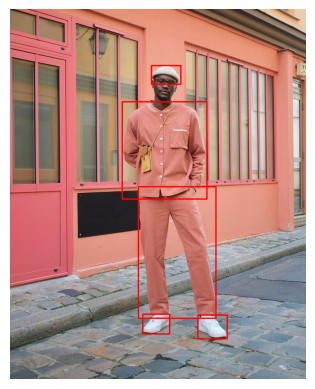

In [9]:
draw_bounding_box(Image.open(image_path).convert("RGB"),detection_item["bboxes"])

# Image-to-Image Retrieval

In [12]:
# Construct JSON payload
payload = {
    "image_base64": image_base64,
    "items":detection_item
}
k=1
# Send POST request to the FastAPI endpoint
response = requests.post(f"http://127.0.0.1:8000/ai/image-retrieval?k={k}", json=payload)
retrieval_output = response.json()
retrieval_output

{'retrieved_image_paths': ['assets/image_database/Yor Forger.png',
  'assets/image_database/Yor Forger.png',
  'assets/image_database/Yor Forger.png',
  'assets/image_database/Yor Forger.png',
  'assets/image_database/Yor Forger.png'],
 'detected_labels': ['bottom', 'hat', 'shoes', 'shoes', 'outer'],
 'similarity_scores': [0.6214, 0.6839, 0.5217, 0.5152, 0.631]}

# Fashion Analysis

In [20]:
# Construct JSON payload
payload = {
    "image": {"image_base64": image_base64},
    "data": retrieval_output
}

# Query param
params = {"user_query": "I want something stylish, something glamour?"}

# Send request
response = requests.post(
    "http://127.0.0.1:8000/ai/response-generation-fasion-advisor",
    params=params,
    json=payload
)

print(response.json())

{'response': "**Overall Assessment:**\n\nThe user's outfit exudes a stylish and modern aesthetic. The salmon-colored ensemble, consisting of a button-up shirt and matching pants, creates a cohesive and trendy look. The addition of a white beret and white sneakers adds a touch of sophistication.\n\n**What Works Well:**\n\n*   **Color Coordination:** The salmon color of the outfit is well-coordinated and creates a harmonious look.\n*   **Silhouette:** The silhouette of the outfit is modern and stylish, with a fitted shirt and straight-leg pants.\n*   **Accessories:** The white beret and white sneakers add a touch of elegance to the overall look.\n\n**What Could Be Improved:**\n\n*   **Layering:** Consider adding a layering piece, such as a denim jacket or a leather jacket, to add depth to the outfit.\n*   **Fabric Texture:** The fabric texture of the outfit appears to be smooth. Mixing different textures, such as adding a rough-textured accessory, could add visual interest.\n\n**Fashion 